In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.interpolate import interp1d
import pprint

In [2]:
x = np.array([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], dtype = np.float64)
y = np.array([8.9, 9.6, 9.9, 10.3, 10.4, 10.3, 10.2, 10.7])

In [13]:
def polyInter(x, y, t, m):
    m += 1 # превращаем степень многочлена в количество точек :)
    n = x.shape[0]
    
    xc = np.zeros(n-1)
    for i in range(n-1):
        xc[i] = (x[i+1] - x[i]) / 2 + x[i]
    
    step = (x[-1] - x[0])/(n-1) # шаг сетки
    xloc = int( (t - x[0]) / step ) # в какой ячейке лежит нужная точка
    
    # номер отрезка
    stepIdx = min(n-m, xloc)
    
    # сдвиг для переваливания через середину отрезка
    polyShift = 0
    #print(t - x[xloc])
    if t - x[xloc] >= step / 2:
        polyShift = 1
    start = stepIdx + polyShift
    
    # левая точка для построения полинома
    if xloc >= 2:
        start = start - int(m / 2)
        
    # Обработка левого края
    if t - x[0] < (m / 2) * step:
        start = 0
    # Обработка правого края
    if x[-1] - t <= (m / 2) * step:
        start = n - m
    
    # обработка перехода от первого полинома ко второму
    # только для степени 2 - как находить универсальные переходы для любых степеней?
    if xloc == 1 and polyShift == 1:
        start = 1
    
    #print("stepIdx:", stepIdx, "\t xloc: ", xloc,"\t start: ", start,"\t t: ", t)
    
    A = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            A[i, j] = x[start+i] ** j
    a = np.linalg.solve(A, y[start : start+m])
    return sum(ai * t ** i for i, ai in enumerate(a))

In [14]:
polyInter(x, y, 2019, 2)

10.622999999997774

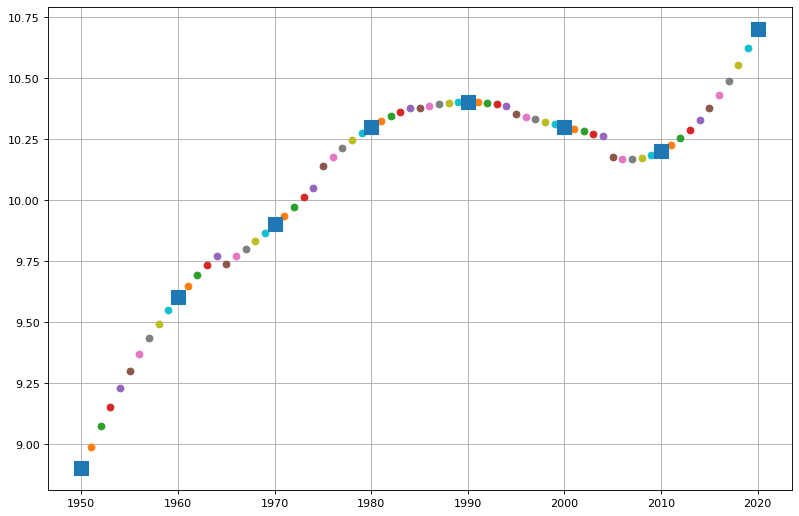

In [15]:
plt.figure(figsize=(12, 8), dpi=80)
for i in range(1950, 2020):
    plt.plot(i, polyInter(x, y, i, 2), 'o')
plt.plot(x, y, 's', markersize=12)
plt.grid()

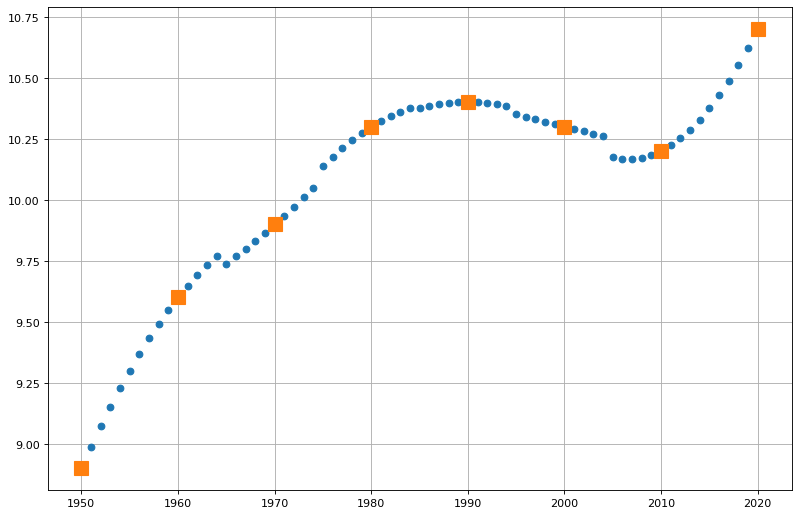

In [19]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(np.arange(1950, 2021), [polyInter(x, y, i, 2) for i in range(1950, 2021)], 'o')
plt.plot(x, y, 's', markersize=12)
plt.grid()

In [6]:
for xi in x:
    print(polyInter(x, y, xi, 2))

8.899999999999636
9.599999999999454
9.899999999999864
10.299999999999272
10.400000000000546
10.300000000000004
10.199999999998909
10.69999999999709
